# Unveiling Patterns: A Time Series Exploration of City Service Complaints


The NYC 311 Calls dataset serves as a comprehensive record of the millions of non-emergency service requests made by the residents of New York City. Facilitated through the NYC 311 service, this dataset captures a diverse array of requests, ranging from reporting issues with city services to seeking information about various government programs. The invaluable insights derived from this dataset shed light on the multifaceted nature of urban challenges, providing a rich resource for understanding community needs and service responsiveness.

The dataset's dynamic nature reflects the continuous engagement between residents and city services, offering a real-time snapshot of the evolving urban landscape. By leveraging this dataset, city authorities can gain actionable intelligence for strategic resource allocation, operational improvements, and effective community engagement.

The NYC 311 Calls dataset is not merely a collection of service requests; it is a key instrument for enhancing civic transparency, understanding the pulse of the city, and optimizing service delivery to ensure a more responsive and satisfying urban experience for residents.

# Comprehensive Data Exploration

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

In [6]:

# Load your dataset 
df = pd.read_pickle('Project-3_NYC_311_Calls.pkl')

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())



Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780977 entries, 0 to 33780976
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Agency                  object        
 3   Agency Name             object        
 4   Complaint Type          object        
 5   Descriptor              object        
 6   Location Type           object        
 7   Incident Zip            object        
 8   City                    object        
 9   Resolution Description  object        
 10  Borough                 object        
 11  Open Data Channel Type  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.0+ GB
None


In [7]:
df

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
0,20184537,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
1,20184538,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN
2,20184539,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
3,54732265,2022-07-08 11:14:43,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10467.0,BRONX,The Department of Sanitation investigated this...,BRONX,PHONE
4,20184540,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...
33780972,20184532,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10468,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
33780973,20184533,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10018,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
33780974,20184534,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,STAIRS,RESIDENTIAL BUILDING,10460,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
33780975,20184535,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,GAS,RESIDENTIAL BUILDING,11236,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN


In [8]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780977 entries, 0 to 33780976
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Agency                  object        
 3   Agency Name             object        
 4   Complaint Type          object        
 5   Descriptor              object        
 6   Location Type           object        
 7   Incident Zip            object        
 8   City                    object        
 9   Resolution Description  object        
 10  Borough                 object        
 11  Open Data Channel Type  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.0+ GB


## Top 10 Complaint Descriptors: Identifying the Most Common Issues

This analysis focuses on extracting meaningful insights from a city service complaints dataset, with an emphasis on identifying prevalent issues through the top 10 complaint descriptors. The primary objective is to provide decision-makers with a strategic understanding of the data, enabling them to prioritize issue resolution, allocate resources effectively, and enhance overall service delivery. By delving into temporal patterns and trends, decision-makers gain valuable information for informed policy adjustments, ensuring that city services operate efficiently and responsively.

Moreover, this exploration extends beyond operational efficiency to encompass community engagement. A comprehensive understanding of common complaints serves as a foundation for improved communication between city officials and residents. This engagement not only addresses concerns but also contributes to enhanced overall satisfaction. The insights derived from the analysis offer a multifaceted approach, guiding decision-makers in their efforts to create a more responsive, efficient, and community-oriented city service framework.

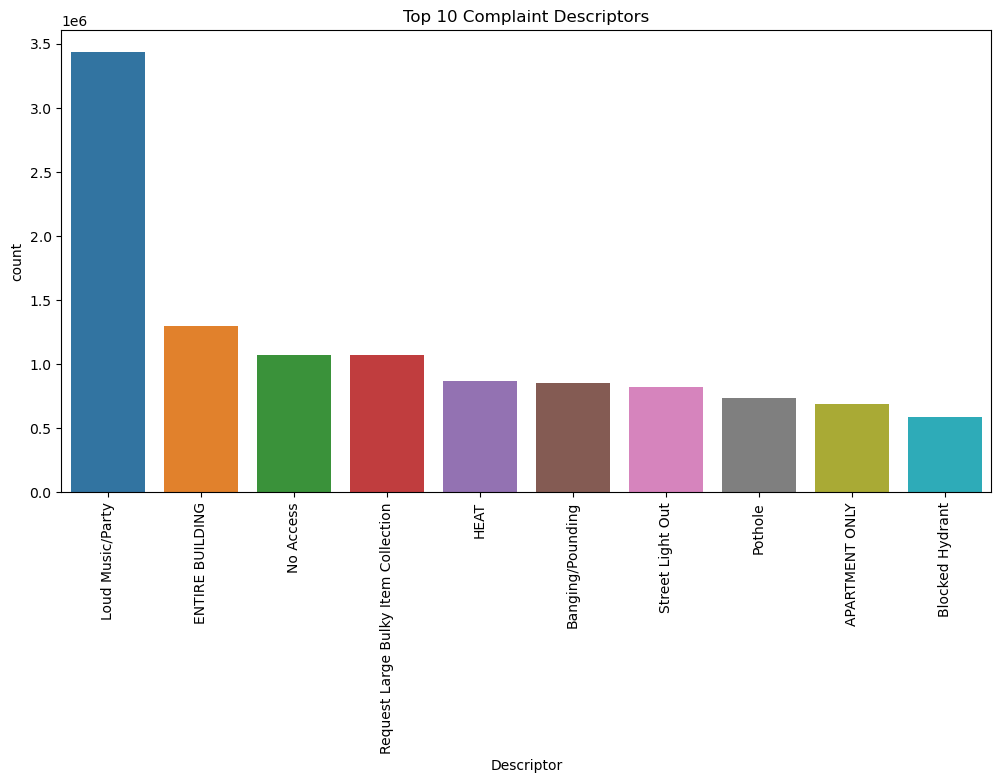

In [9]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Descriptor', data=df, order=df['Descriptor'].value_counts().head(10).index)
plt.title('Top 10 Complaint Descriptors')
plt.xticks(rotation=90)
plt.show()

## City Services Complaints Distribution Across Boroughs

This analysis focuses on the spatial distribution of city service complaints across boroughs, aiming to uncover patterns and variations in complaint volumes. The primary objective is to inform resource allocation, strategic planning, community engagement, and performance evaluation for city services. By pinpointing boroughs with higher complaint rates, authorities can strategically allocate resources, tailor policies, engage with residents effectively, and assess service effectiveness for continuous improvement. In essence, this analysis acts as a foundational step in understanding geographic complaint distribution, providing actionable insights to optimize service delivery and bolster community satisfaction across the city's diverse boroughs.

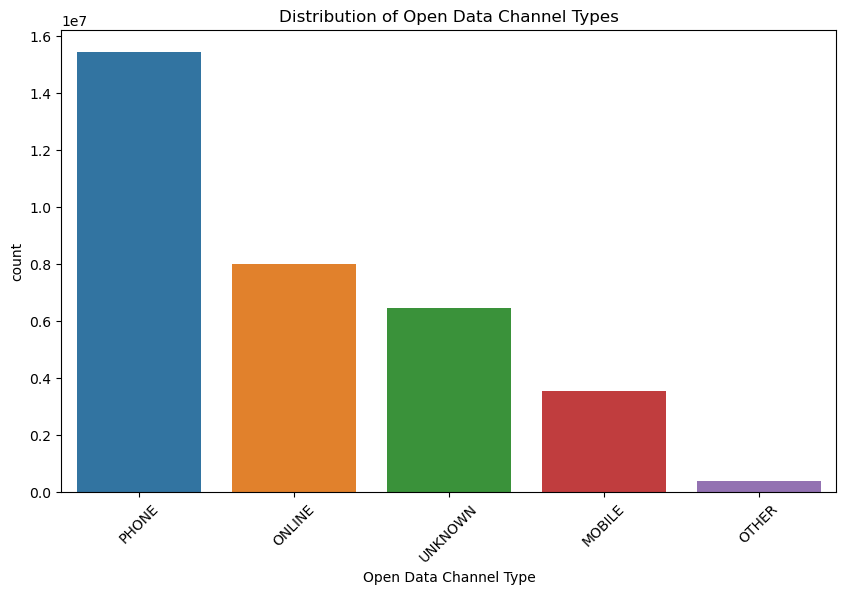

In [11]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Open Data Channel Type', data=df, order=df['Open Data Channel Type'].value_counts().index)
plt.title('Distribution of Open Data Channel Types')
plt.xticks(rotation=45)
plt.show()

## City Services Complaints Across Boroughs


This analysis examines the distribution of city service complaints across different boroughs, aiming to reveal the number of complaints in each borough. The primary goal is to gain insights into the spatial distribution of service-related issues, allowing for the identification of boroughs with higher complaint volumes. Understanding the complaint landscape in each borough is essential for effective resource allocation, strategic planning, community engagement, and performance evaluation of city services. This analysis provides a foundation for city authorities to address prevalent issues efficiently, tailor policies based on specific borough needs, engage with residents effectively, and assess the overall effectiveness of services in different parts of the city.

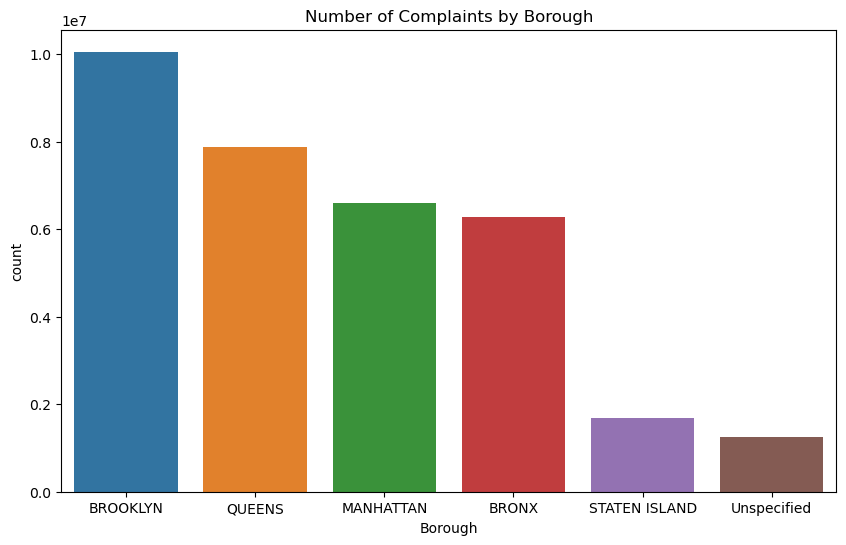

In [10]:
## number of complaints in each borough.

plt.figure(figsize=(10, 6))
sns.countplot(x='Borough', data=df, order=df['Borough'].value_counts().index)
plt.title('Number of Complaints by Borough')
plt.show()

## Temporal Patterns and Trends in Daily Complaints

This analysis employs two key visualizations to delve into the temporal dynamics of daily city service complaints. The autocorrelation plot examines the autocorrelation at different lag intervals, aiming to identify potential seasonality and trends in the data. Concurrently, the rolling statistics plot, including the rolling mean and standard deviation over a 30-day window, provides insights into the overall trend within the time series. The primary objective is to uncover any discernible patterns or trends in the daily complaint data.

The benefits of this analysis lie in its ability to reveal temporal structures within the dataset. By identifying autocorrelation patterns, decision-makers gain insights into potential seasonality and recurring trends in service-related complaints. The rolling statistics plot aids in trend analysis, providing a visual representation of how the complaint volumes change over time. These insights are crucial for informed decision-making, resource planning, and the development of responsive strategies to address service-related issues efficiently. Ultimately, this analysis contributes to a more nuanced understanding of the temporal dynamics surrounding daily city service complaints, guiding proactive measures for improved service delivery.

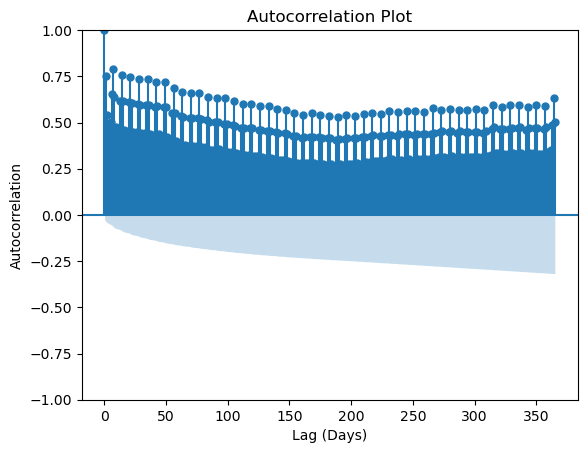

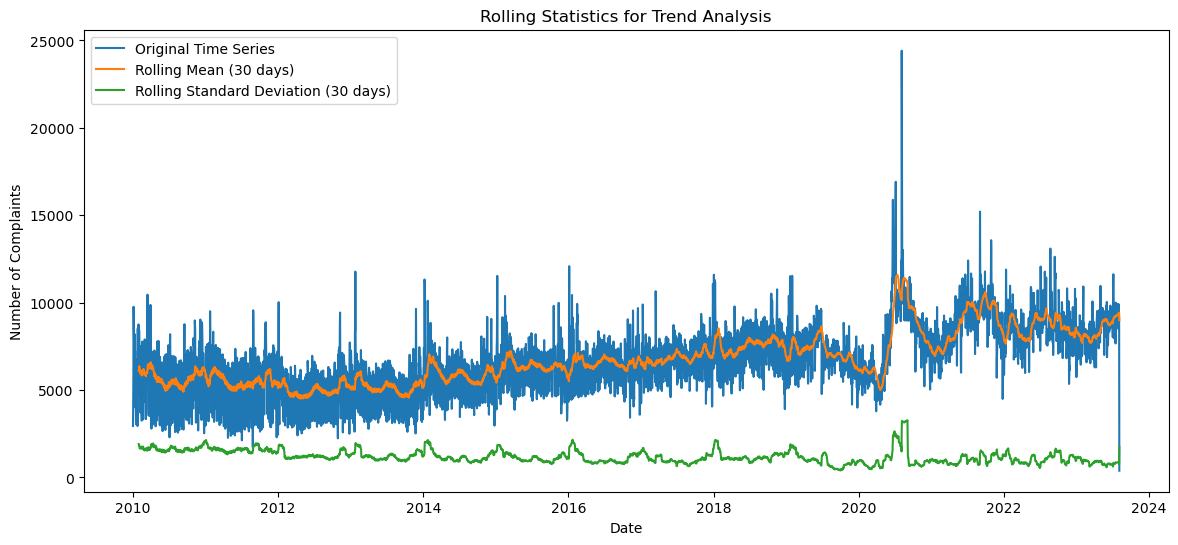

In [22]:
# Autocorrelation plot to identify seasonality and trend


plot_acf(daily_complaints, lags=365)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()

# Rolling statistics for trend analysis
rolling_mean = daily_complaints.rolling(window=30).mean()
rolling_std = daily_complaints.rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(daily_complaints, label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.plot(rolling_std, label='Rolling Standard Deviation (30 days)')
plt.title('Rolling Statistics for Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend()
plt.show()

## Decomposing Daily Complaints Time Series

This analysis involves two pivotal visualizations to unravel the temporal characteristics of the daily city service complaints time series. The first plot showcases the raw time series of daily complaints over the entire dataset duration, providing an overview of the general trend. The second visualization involves decomposing the time series into its constituent components—trend, seasonality, and residual variations—using an additive model with a yearly period of 365 days.

The primary goal is to understand the inherent structures within the time series data. Decomposition allows for the identification of long-term trends, recurring seasonal patterns, and residual variations, offering a comprehensive understanding of the temporal dynamics of daily complaints. This analysis is beneficial for decision-makers as it provides actionable insights into the underlying patterns influencing complaint volumes over time. By discerning the components of the time series, city authorities can make informed decisions related to resource allocation, strategic planning, and responsive measures to address service-related issues. In essence, this analysis contributes to a nuanced understanding of the temporal nuances in daily city service complaints, facilitating more effective and targeted interventions.

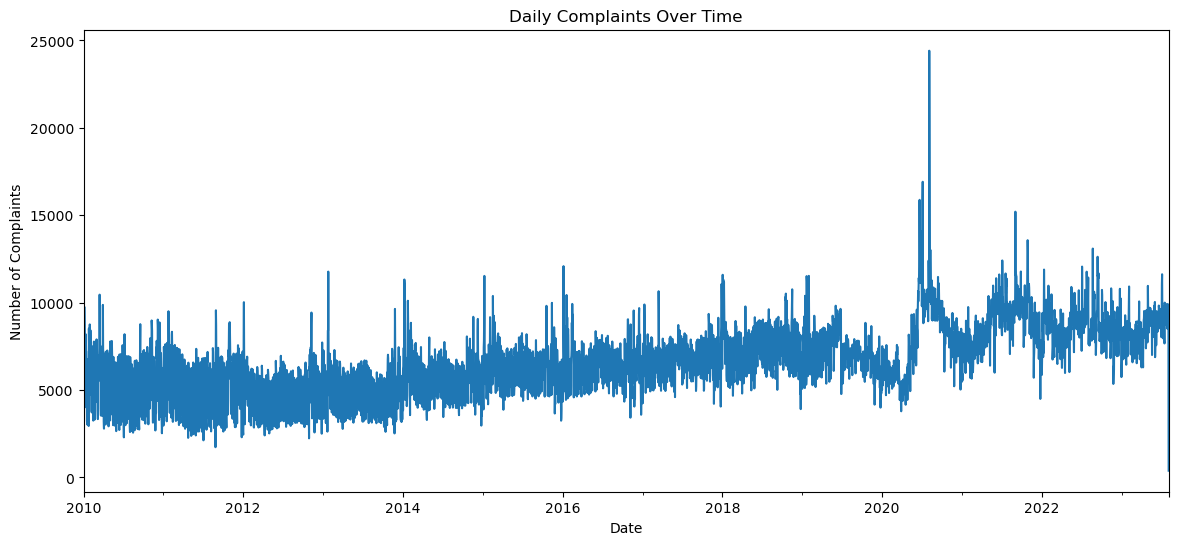

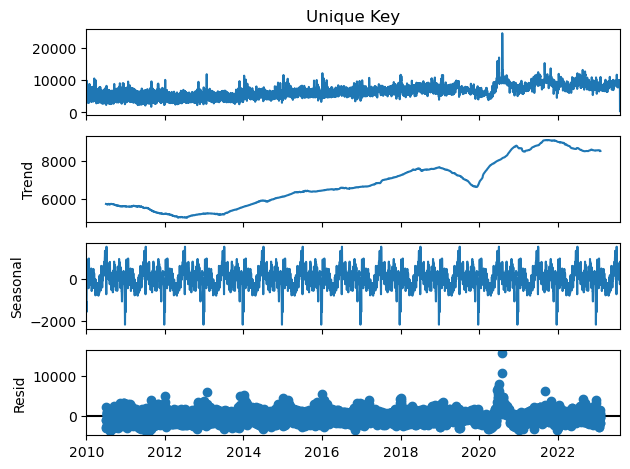

In [21]:
# Plot the time series
plt.figure(figsize=(14, 6))
daily_complaints.plot()
plt.title('Daily Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Decompose the time series into trend, seasonality, and residual components


result = seasonal_decompose(daily_complaints, model='additive', period=365)
result.plot()
plt.show()

## Average Daily Complaints in the Year 2022

This analysis calculates the average daily complaints in 2022, providing a concise metric for understanding the typical daily service-related concerns reported by residents. The result serves as a key indicator for resource planning and aids in optimizing operational efficiency to address community needs more effectively.

In [12]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Filter the data for the year 2022
df_2022 = df[df['Created Date'].dt.year == 2022]

# Resample by day and count the number of complaints
daily_complaints_2022 = df_2022.resample('D', on='Created Date')['Unique Key'].count()

# Calculate the average number of daily complaints
average_daily_complaints_2022 = daily_complaints_2022.mean()

print(f"The average number of daily complaints received in 2022 is: {average_daily_complaints_2022:.2f}")

The average number of daily complaints received in 2022 is: 8684.32


## Peak Day of Complaint Activity Across the Dataset

This analysis identifies the date with the highest number of service-related complaints throughout the entire dataset. The outcome serves as a crucial metric for pinpointing peak periods of community concern, aiding decision-makers in understanding the specific days when service demands are exceptionally high. 


In [13]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Resample by day and count the number of complaints for the entire dataset
daily_complaints_all = df.resample('D', on='Created Date')['Unique Key'].count()

# Find the date with the maximum number of complaints in the entire dataset
date_with_max_complaints_all = daily_complaints_all.idxmax()

print(f"The date with the maximum number of calls received throughout the dataset is: {date_with_max_complaints_all.strftime('%Y-%m-%d')}")

The date with the maximum number of calls received throughout the dataset is: 2020-08-04


## Identifying Key Complaint Type on Peak Activity Date

On August 4, 2020, complaints about damaged trees likely surged due to the impact of Tropical Storm Isaias, which swept through Greater New York. The storm caused widespread damage, leading to increased concerns and reports of tree-related issues, as evident in subsequent news articles highlighting the aftermath and impact on power services in the region.


In [26]:
# Filter the dataset for the date with the maximum number of calls
max_calls_date_data = df[df['Created Date'].dt.date == date_with_max_complaints_all.date()]

# Find the most important complaint type on that date
most_important_complaint_type = max_calls_date_data['Complaint Type'].value_counts().idxmax()

print(f"On the date with the maximum number of calls ({date_with_max_complaints_all.strftime('%Y-%m-%d')}), the most important complaint type was: {most_important_complaint_type}")


On the date with the maximum number of calls (2020-08-04), the most important complaint type was: Damaged Tree


## Identifying the Quietest Month in Complaint Activity History

This analysis groups city service complaints by month, aiming to uncover patterns and pinpoint the historically quietest month. The outcome, denoting the month with the lowest complaint activity, provides decision-makers with a valuable reference point for understanding periods of decreased community concerns

In [27]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Group the data by month and count the number of complaints
monthly_complaints = df.resample('M', on='Created Date')['Unique Key'].count()

# Find the quietest month
quietest_month = monthly_complaints.idxmin()

print(f"The historically quietest month is: {quietest_month.strftime('%Y-%m')}")

The historically quietest month is: 2023-08


## Decomposing Seasonal Patterns in Daily Complaints

This analysis involves resampling daily city service complaints to explore seasonal patterns using ETS decomposition. The focus is on determining the value of the seasonal component specifically on December 25, 2020. Extracting this information is crucial for understanding any distinctive seasonal trends on Christmas Day, offering valuable insights for resource planning and service adjustments during festive periods. The analysis aids decision-makers in tailoring strategies to accommodate the unique service-related demands observed on specific dates, contributing to more responsive and effective city service management.

In [28]:

df['Created Date'] = pd.to_datetime(df['Created Date'])

# Resample the data to daily frequency
daily_complaints = df.resample('D', on='Created Date')['Unique Key'].count()

# Perform ETS decomposition
result = sm.tsa.seasonal_decompose(daily_complaints, model='additive')

# Access the seasonal component and extract the value on 2020-12-25
seasonal_component_on_date = result.seasonal['2020-12-25']

print(f"The value of the seasonal component on 2020-12-25 is: {round(seasonal_component_on_date)}")

The value of the seasonal component on 2020-12-25 is: 183


## Autocorrelation of Daily Complaints with Lag 1

This analysis calculates the autocorrelation of daily city service complaints with a lag of 1 day. The obtained autocorrelation coefficient measures the strength and direction of the linear relationship between daily complaint counts and those of the previous day. Understanding this autocorrelation is beneficial for uncovering temporal dependencies in the dataset, aiding in the identification of potential patterns or trends that repeat on a daily basis. Decision-makers can leverage this information to optimize resource allocation and operational strategies based on observed historical patterns in daily complaint activity.

In [29]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Resample the data to daily frequency
daily_complaints = df.resample('D', on='Created Date')['Unique Key'].count()

# Calculate autocorrelation with lag 1
autocorrelation_lag_1 = daily_complaints.autocorr(lag=1)

print(f"The autocorrelation with lag 1 is: {autocorrelation_lag_1:.4f}")

The autocorrelation with lag 1 is: 0.7517


## Daily Complaint Forecasting with Exponential Smoothing

This analysis utilizes Exponential Smoothing to forecast daily city service complaints. The model is trained on historical data and tested against a 90-day period, providing predictions for complaint counts. The visualization illustrates the alignment between actual and predicted values, offering decision-makers a tool for anticipating future complaint trends. The Root Mean Squared Error (RMSE) serves as a quantitative measure of model accuracy, crucial for evaluating the forecasting performance and guiding adjustments in city service planning and resource allocation strategies.

/Users/ananyayadav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


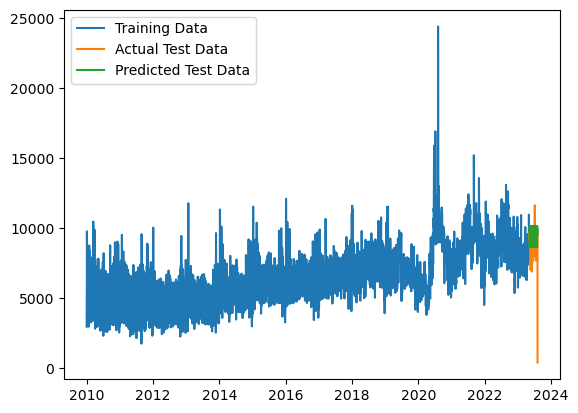

The RMSE on the test set is approximately: 1252.59


In [31]:

df['Created Date'] = pd.to_datetime(df['Created Date'])

# Resample the data to daily frequency
daily_complaints = df.resample('D', on='Created Date')['Unique Key'].count()

# Split the data into training and test sets
train_size = len(daily_complaints) - 90
train_data = daily_complaints.iloc[:train_size]
test_data = daily_complaints.iloc[train_size:]

# Initialize and fit the Exponential Smoothing model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)  # Assuming weekly seasonality
model_fit = model.fit()

# Make predictions on the test set
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the actual vs. predicted values
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data')
plt.plot(y_pred, label='Predicted Test Data')
plt.legend()
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, y_pred))
print(f"The RMSE on the test set is approximately: {rmse:.2f}")